In [1]:
from Forest_Fire import ForestFire
from Map_Generator import show_map, Square_Burn
import geopandas
from matplotlib import pyplot as plt
import imageio

In [2]:
world = geopandas.read_file('area.geojson')
#world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [5]:
n = 3
m = 3
fire = ForestFire((n+1) * 10, (m+1)*10, 0.9)
fire.run_model()
world['gdp_per_cap'] = Square_Burn(fire.MatrixHistory[0],3,3)

/Users/julianchan/anaconda3/envs/test/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/julianchan/anaconda3/envs/test/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


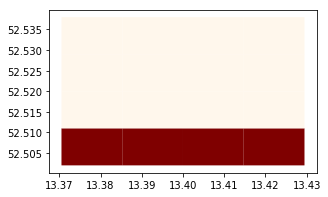

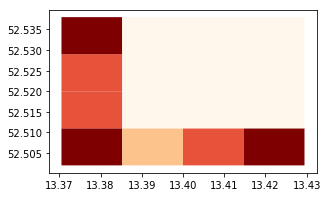

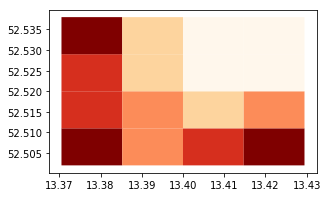

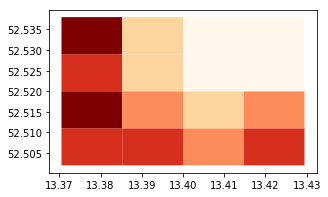

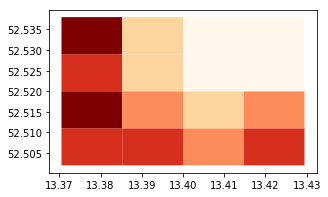

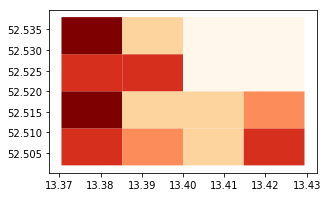

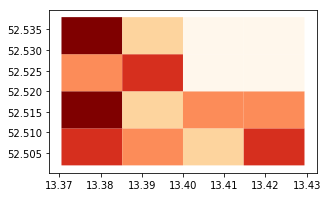

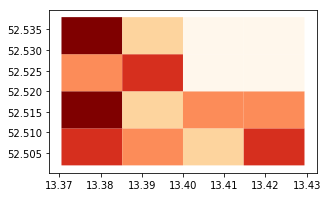

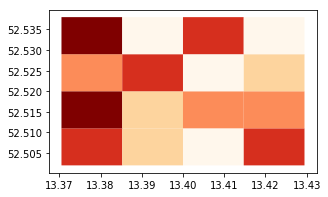

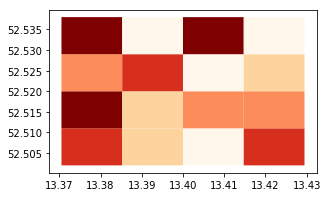

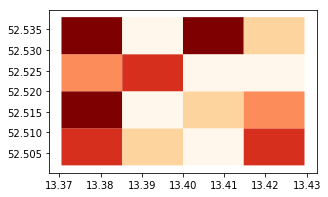

In [10]:

images = []
for i in range(0, len(fire.MatrixHistory), 10000):
    world['gdp_per_cap'] = Square_Burn(fire.MatrixHistory[i],3,3)
    world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(10, 3))
    #plt.axis((-180+i, -90+i, 0, 90))
    filename = 'tiles/slice{:0d}.png'.format(i)
    plt.savefig(filename)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=10)

In [36]:
show_map()

Enter the latitude: 52.52
Enter the longitude: 13.4
Enter (an odd) number of subdivision for longitude3
Enter (an odd) number of subdivision for latitude3
Enter the length of the evacuation area (in KM): 5
Enter the width of the evacuation area (in KM): 5
